## MachineHack Hackathon: Forest Cover Classification: Weekend Hackathon #12


## The dataset has been taken from UCI, but to keep the spirit of competition right, we have added some noise in the labels. In this hackathon, we challenge all Machinehackers to predict the forest cover types (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data).

The actual forest cover type for a given 30 x 30-meter cell was determined from US Forest Service (USFS) Region to Resource Information System data. Independent variables were then derived from the data obtained from the US Geological Survey and USFS.

The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type (one-hot-encoded). 



## The wilderness areas are:
1 - Rawah Wilderness Area
2 - Neota Wilderness Area
3 - Comanche Peak Wilderness Area
4 - Cache la Poudre Wilderness Area


In [2]:
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


Bad key "text.kerning_factor" on line 4 in
/Users/praneeth/anaconda3/envs/tensorflow/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
trees = pd.read_csv('/Users/praneeth/Downloads/Forest Cover Prediction/train.csv')

In [4]:
trees.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [5]:
trees.tail()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3
15119,15120,2475,197,34,319,78,270,189,244,164,...,0,0,0,0,0,0,0,0,0,3


In [6]:
trees.info()

#there are no null values
# the soil types are one hot encoded columns
#but based on head and tail analysis - there are negative values in Vertical distance to hydrology

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [7]:
#https://note.nkmk.me/en/python-pandas-list/#:~:text=Series%20to%20list-,Convert%20data%20to%20list,method%20to%20convert%20to%20list%20.
#good link to inter convert amongst series, list, array

s = trees.Id

print(type(s))
print(type(s.values))

#this converts series to list and then to array
first_quartile = np.percentile(np.array(trees['Slope'].tolist()),25)

#values converts the series directly to a numpy array
first_quartile = np.percentile(trees['Slope'].values,25)


<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [8]:
#dealing with outliers

def outlier_function(df, col_name):
    first_quartile = np.percentile(df[col_name].values, 25)
    third_quartile = np.percentile(df[col_name].values, 75)
    iqr = third_quartile - first_quartile
    
    upper_limit = third_quartile + 3*iqr
    lower_limit = first_quartile - 3*iqr
    
    outliers = 0
    
    for item in df[col_name]:
        if (item<lower_limit) | (item>upper_limit):
            outliers = outliers + 1
            
    return lower_limit, upper_limit, outliers

In [9]:
first_quartile = np.percentile(trees['Slope'].values,25)

In [10]:
first_quartile

10.0

In [11]:
counter = 0
for item in trees['Slope']:
    if item>30:
        counter = counter + 1

In [12]:
tree_columns = trees.columns

for col_name in tree_columns[0:11]:
    if outlier_function(trees, col_name)[2]>0:
        print("There are", outlier_function(trees, col_name)[2], " outliers in ", col_name )

There are 53  outliers in  Horizontal_Distance_To_Hydrology
There are 49  outliers in  Vertical_Distance_To_Hydrology
There are 3  outliers in  Horizontal_Distance_To_Roadways
There are 7  outliers in  Hillshade_9am
There are 20  outliers in  Hillshade_Noon
There are 132  outliers in  Horizontal_Distance_To_Fire_Points


In [13]:
trees.Hillshade_9am.describe()

count    15120.000000
mean       212.704299
std         30.561287
min          0.000000
25%        196.000000
50%        220.000000
75%        235.000000
max        254.000000
Name: Hillshade_9am, dtype: float64

In [14]:
#removing outliers only from Horizontal Distance to Hydrology per se alone

trees = trees[(trees.Horizontal_Distance_To_Hydrology > outlier_function(trees, 'Horizontal_Distance_To_Hydrology')[0]) & (trees.Horizontal_Distance_To_Hydrology < outlier_function(trees, 'Horizontal_Distance_To_Hydrology')[1])]

In [15]:
trees.Horizontal_Distance_To_Hydrology.describe()

count    15067.000000
mean       223.865534
std        202.764572
min          0.000000
25%         67.000000
50%        180.000000
75%        324.000000
max       1115.000000
Name: Horizontal_Distance_To_Hydrology, dtype: float64

In [17]:
trees.Horizontal_Distance_To_Hydrology.describe()

count    15067.000000
mean       223.865534
std        202.764572
min          0.000000
25%         67.000000
50%        180.000000
75%        324.000000
max       1115.000000
Name: Horizontal_Distance_To_Hydrology, dtype: float64

In [18]:
print(trees.shape)


(15067, 56)


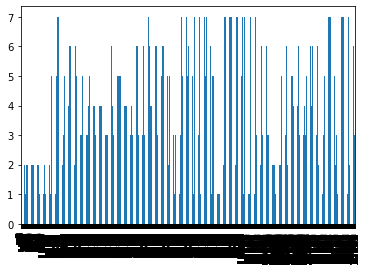

In [65]:
trees.Cover_Type.plot.bar()

In [19]:
#brilliant use of idxmax in the column axis - id of the maximum element

trees['Wilderness_Area_Type']=(trees.iloc[:,11:15]==1).idxmax(1)

In [20]:
pd.idxmax?

Object `pd.idxmax` not found.


In [21]:
trees['Wilderness_Area_Type'].value_counts()

Wilderness_Area3    6296
Wilderness_Area4    4675
Wilderness_Area1    3597
Wilderness_Area2     499
Name: Wilderness_Area_Type, dtype: int64

In [22]:
trees.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [23]:
trees.shape

(15067, 57)

In [25]:
#string based in approach
is_binary_columns = [column for column in trees.columns if ("Wilderness" in column) | ("Soil" in column)]

In [27]:
#eliminating the column having Wilderness Area Type
is_binary_columns = is_binary_columns[0:-1]

In [33]:
#this converts all the series into numpy ndarray
#.ravel() means it is all unrolled out


trees[is_binary_columns].values
trees[is_binary_columns].values.ravel()

array([1, 0])

In [39]:
pd.unique(trees[is_binary_columns].values.ravel())

array([1, 0])

In [54]:
#check if any entity belongs to multiple wilderness type or multiple soil type
trees.iloc[:,11:15].sum(axis = 1).sum()
trees.iloc[:,11:15].sum(axis = 1).count()
#both are same - so there is no such possibility

15067

In [61]:
#no such tree which is present in multiple soil types
trees.iloc[:,15:-2].sum(axis=1).sum()
trees.iloc[:,15:-2].sum(axis=1).count()

15067

In [62]:
trees.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            15110, 15111, 15112, 15113, 15114, 15115, 15116, 15117, 15118,
            15119],
           dtype='int64', length=15067)

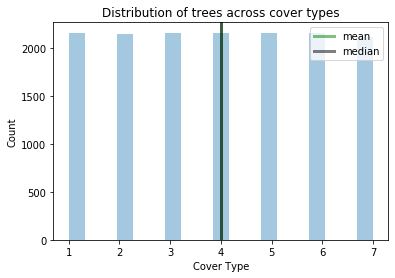

In [73]:

sns.distplot(trees["Cover_Type"], kde = False)

plt.axvline(x = trees.Cover_Type.mean(), linewidth = 3, color = 'g', label = "mean", alpha = 0.5)
plt.axvline(x = trees.Cover_Type.median(), linewidth = 3, color = 'k', label = "median", alpha = 0.5)

plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.title("Distribution of trees across cover types")
plt.legend(["mean","median"])

Text(0.5, 1.0, 'Density of Cover across different wilderness areas')

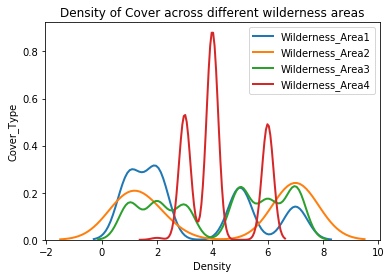

In [93]:
wilderness_types = sorted(trees.Wilderness_Area_Type.value_counts().index.tolist())

for wtype in wilderness_types:
    subset = trees.loc[trees.Wilderness_Area_Type ==wtype]
    sns.kdeplot(subset["Cover_Type"], label = wtype, linewidth = 2)
    
plt.xlabel("Density")
plt.ylabel("Cover_Type")
plt.title("Density of Cover across different wilderness areas")

In [362]:
def tail_return(st):
    head = st.rstrip('0123456789')
    tail = st[len(head):]
    return(int(tail))

trees["Soil_Type"] = trees.iloc[:,15:55].idxmax(1)
trees["Soil_Type_number"] = trees["Soil_Type"].apply(tail_return)

In [125]:
trees.columns[15:55]

trees["Soil_Type"] = trees.iloc[:,15:55].idxmax(1)

In [131]:
trees["Wilderness_Area_number"] = trees["Wilderness_Area_Type"].apply(tail_return)

In [134]:
trees["Soil_Type_number"] = trees["Soil_Type"].apply(tail_return)

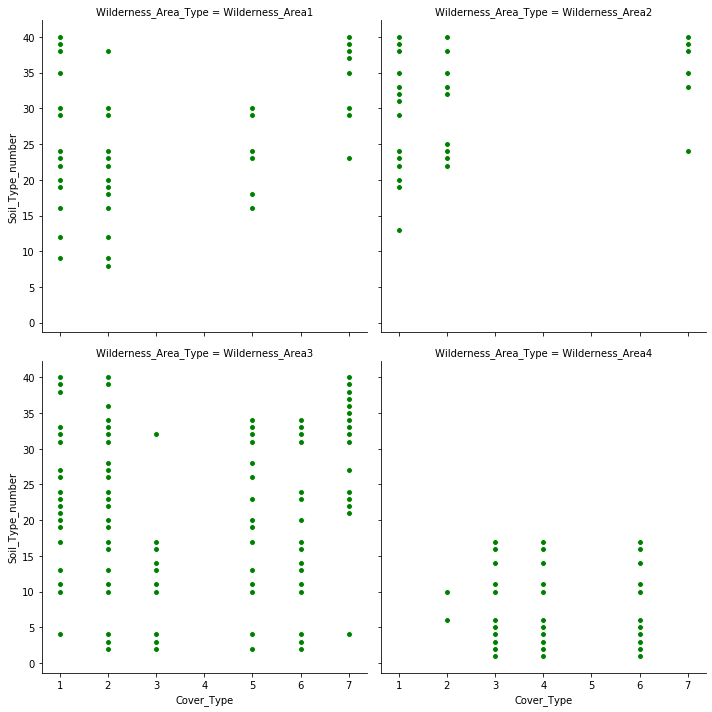

In [139]:
g = sns.FacetGrid(trees, col="Wilderness_Area_Type", 
                  col_wrap=2, height=5, col_order=wilderness_types)
g = g.map(plt.scatter,"Cover_Type", "Soil_Type_number", edgecolor="w", color="g")


In [154]:
continuous_variables = trees.columns[1:11]

def corr_func(x, y, **kwargs):
    r = np.corrcoef(x,y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r), xy = (.2, .8), xycoords = ax.transAxes, size = 20)

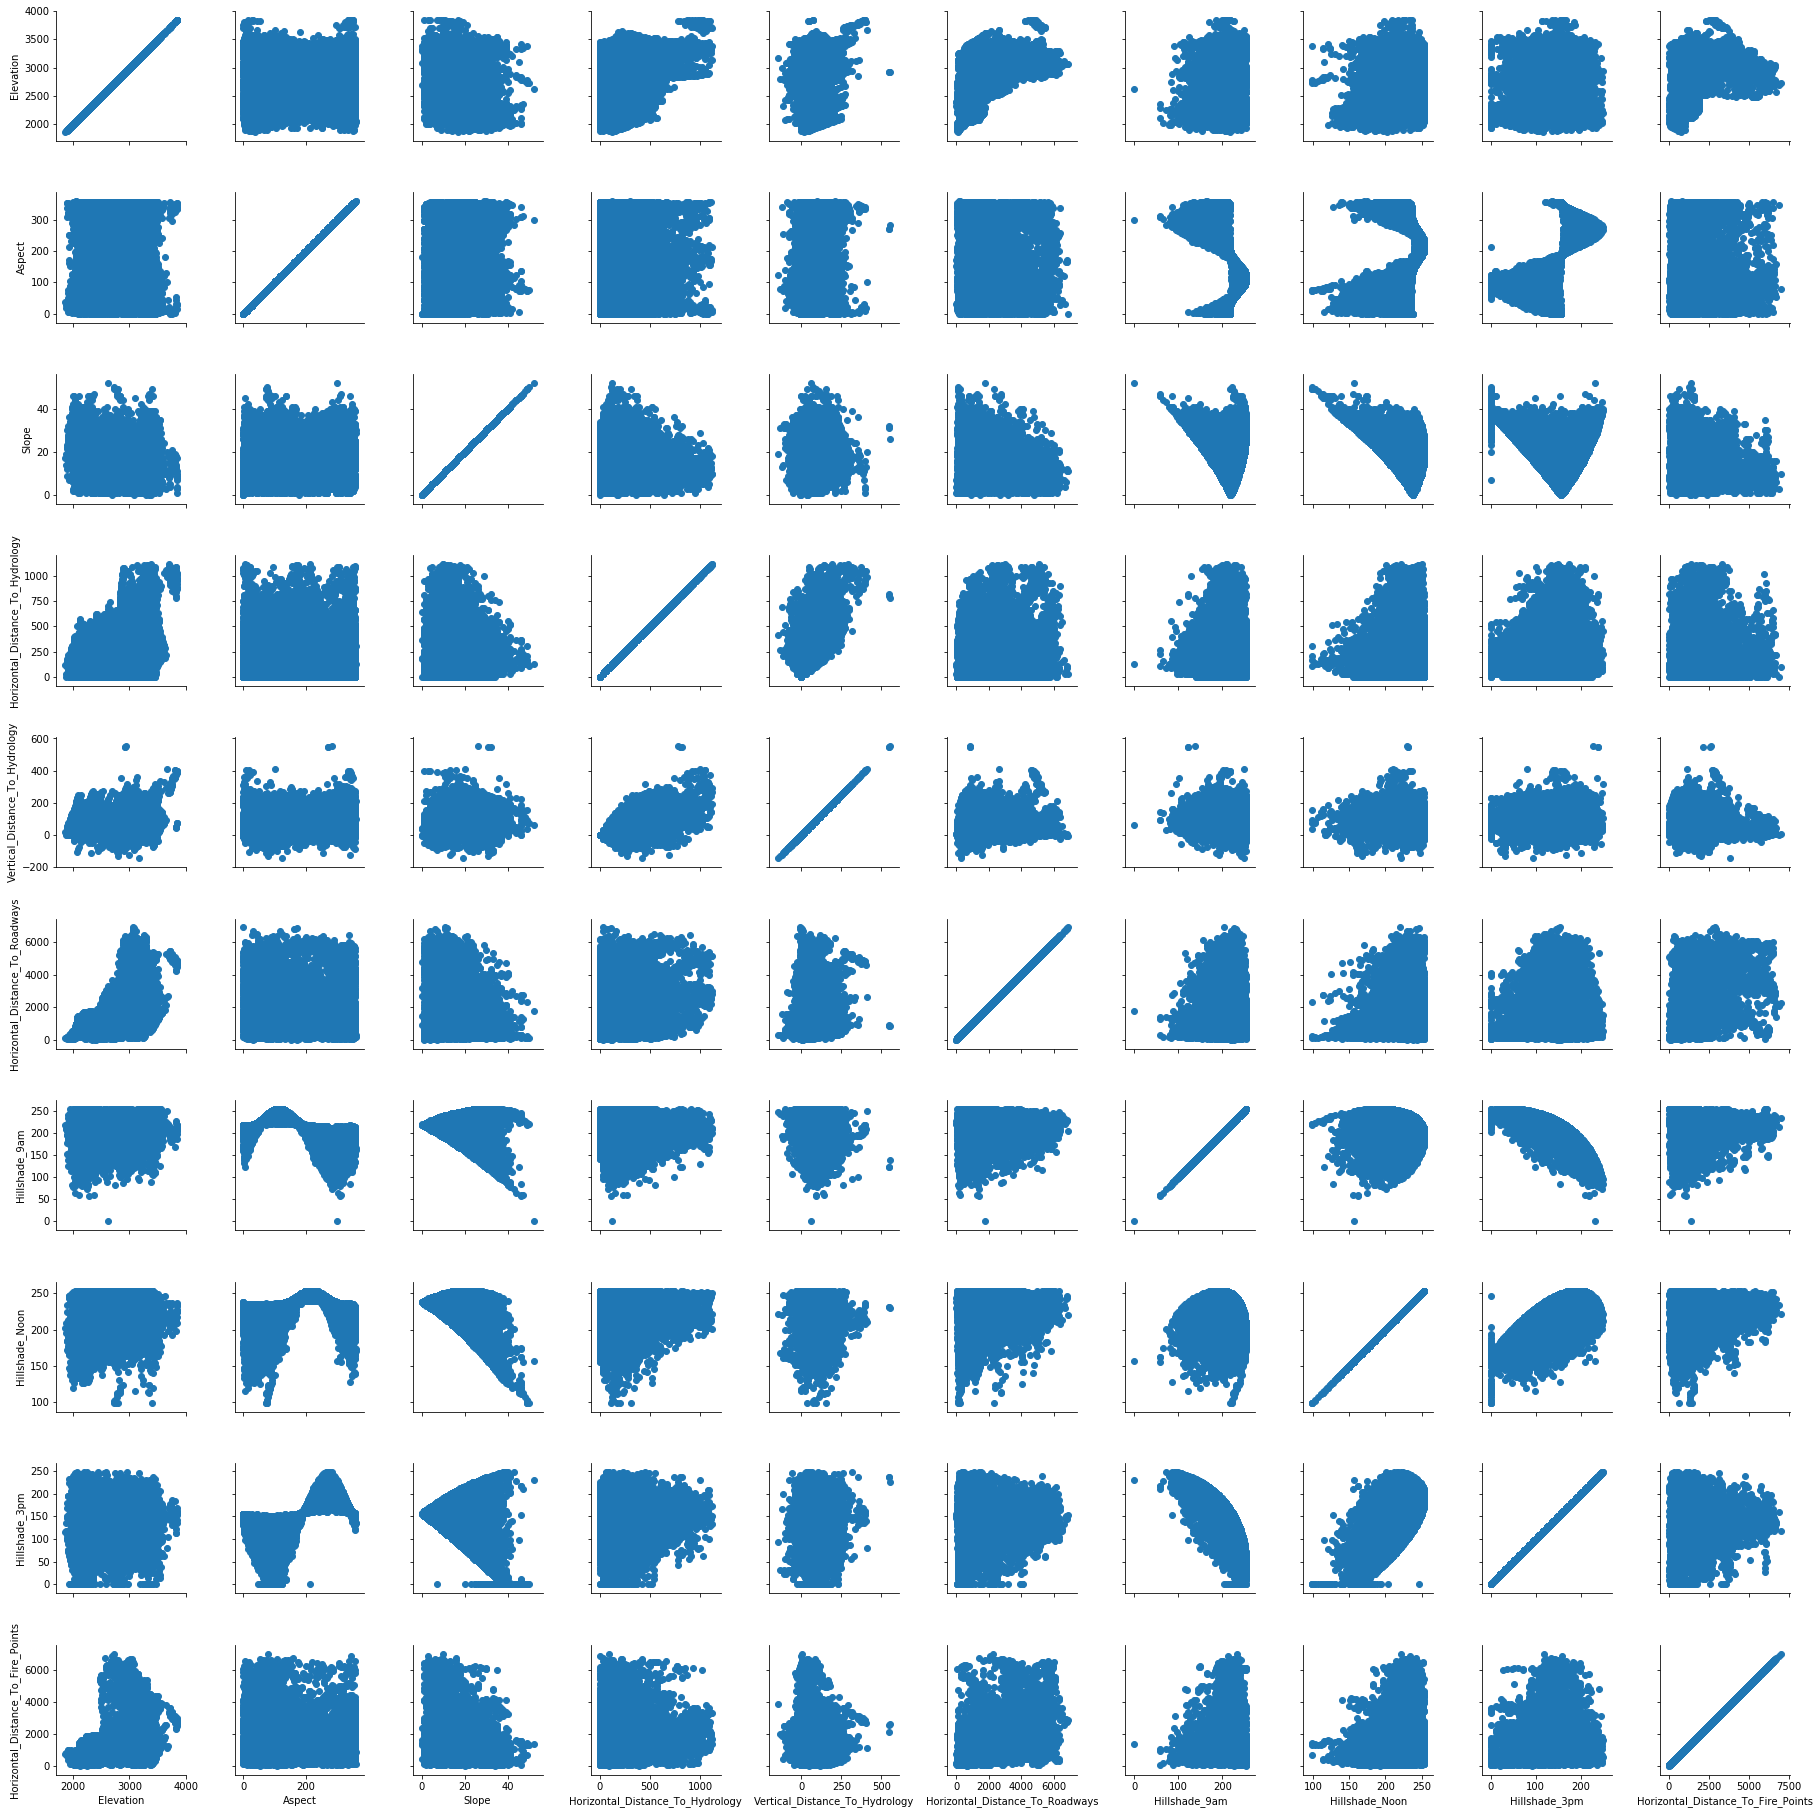

In [155]:
grid = sns.PairGrid(data = trees[continuous_variables])
grid.map(plt.scatter)

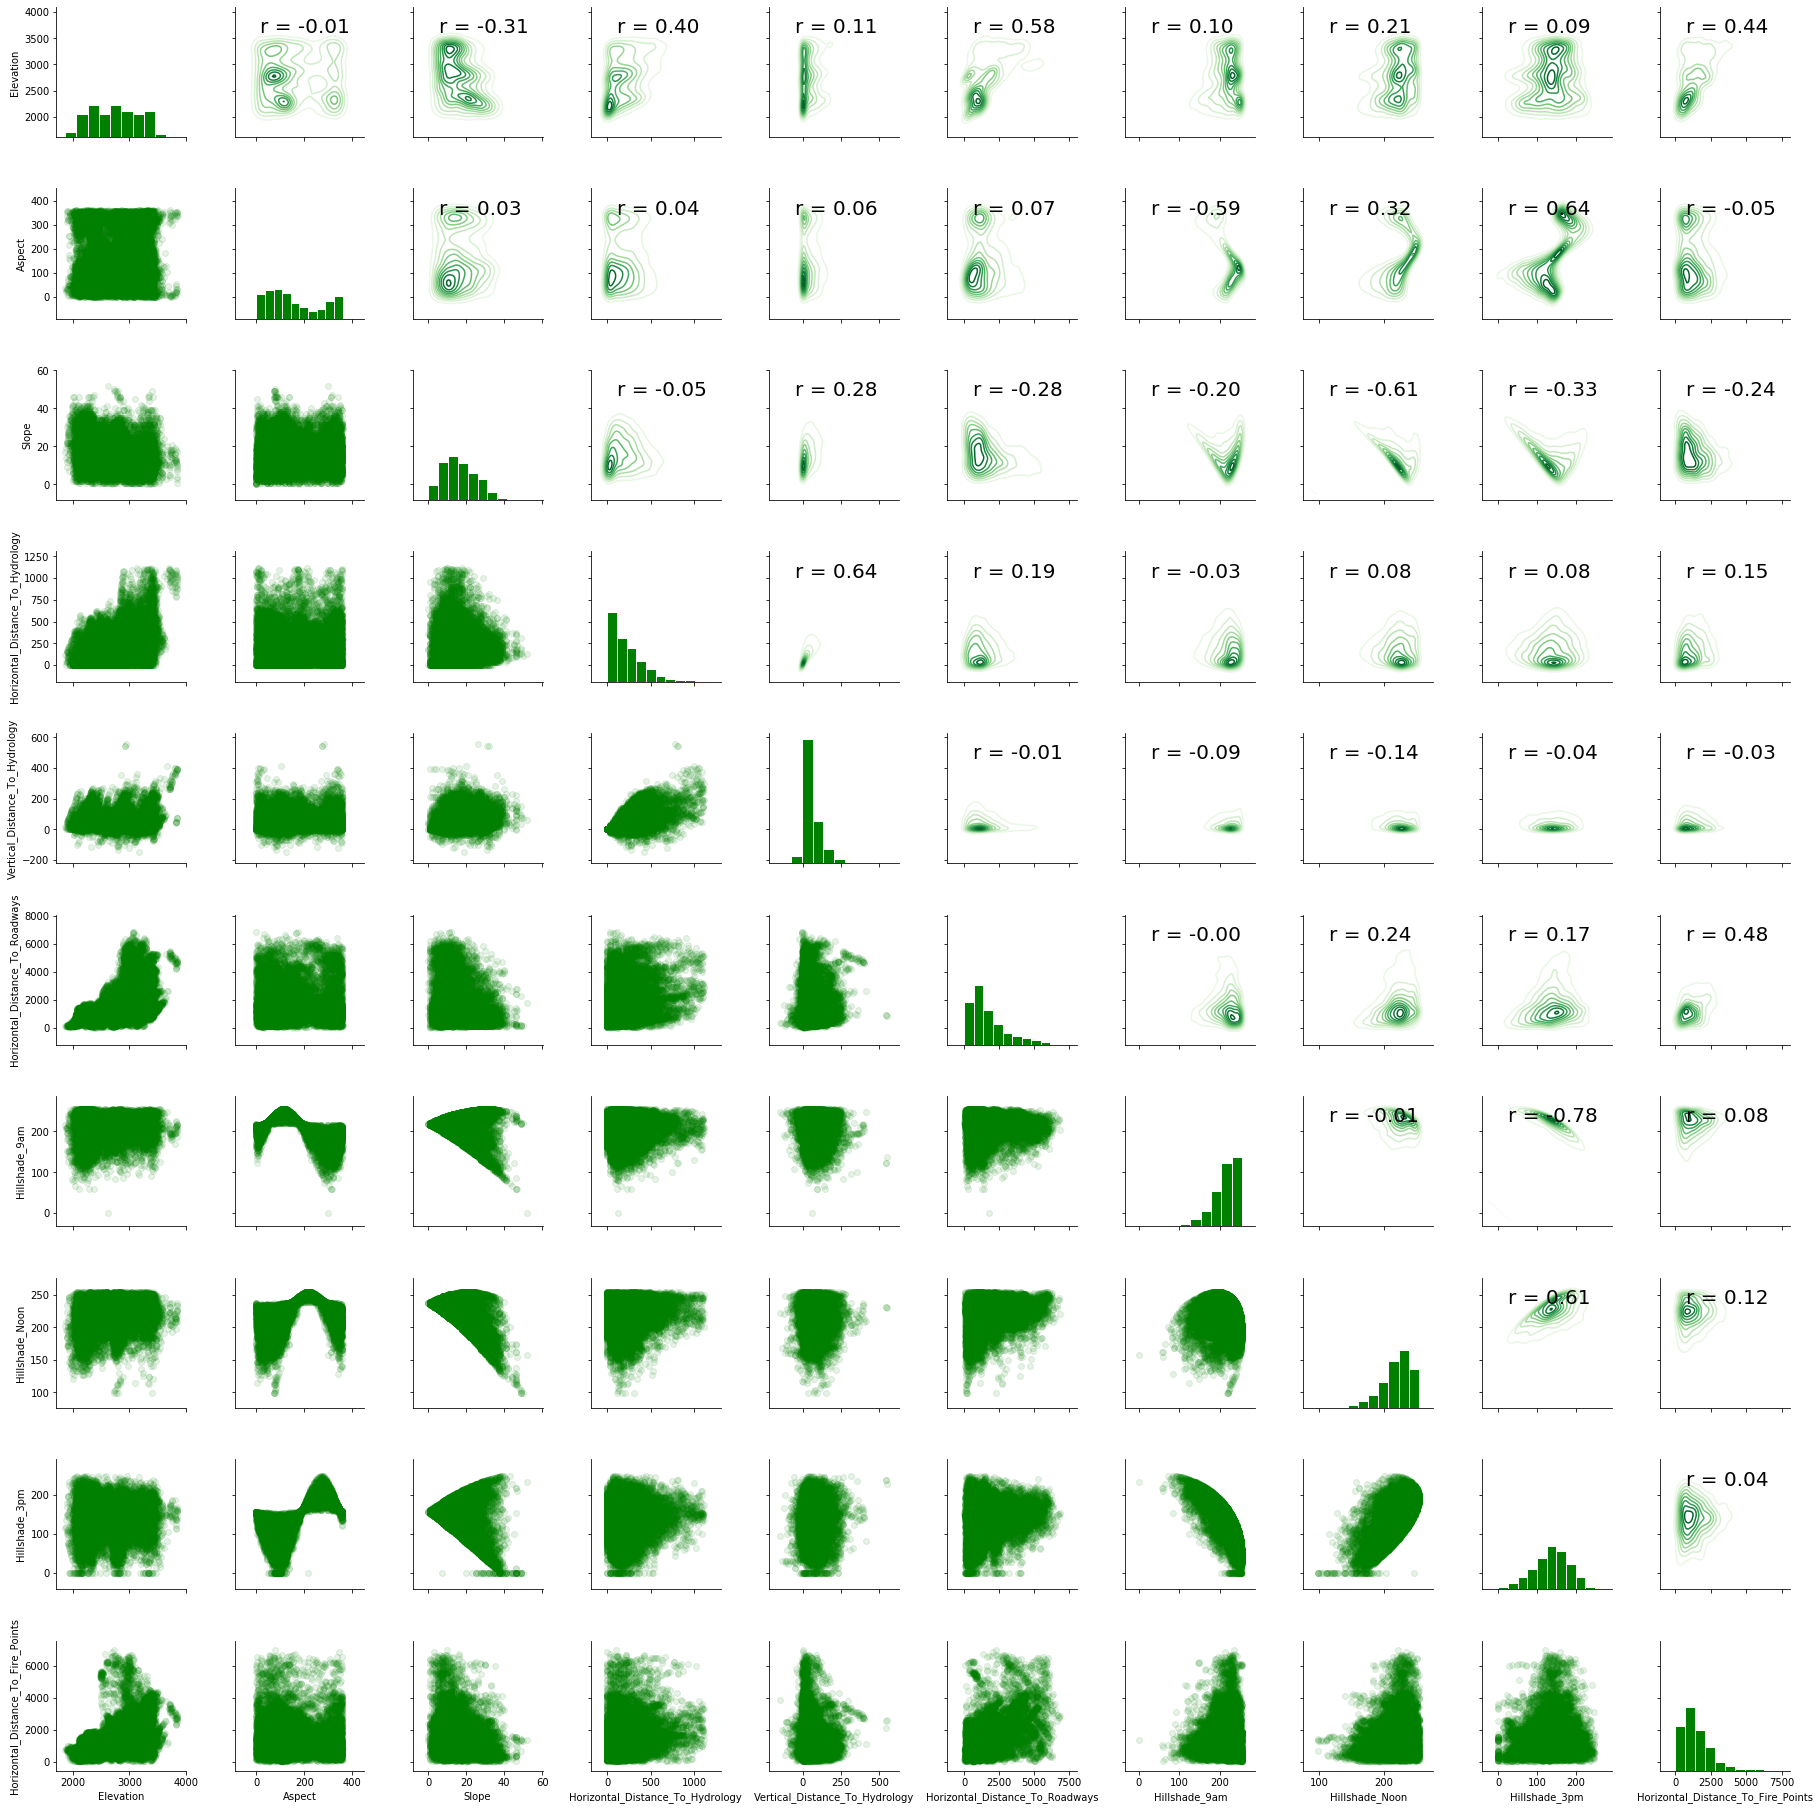

In [157]:
grid = sns.PairGrid(data = trees[continuous_variables])

grid.map_upper(corr_func)
grid.map_upper(sns.kdeplot, cmap = plt.cm.Greens)

grid.map_diag(plt.hist, color = 'green', edgecolor = 'white')

grid.map_lower(plt.scatter, color = 'green', alpha = 0.1)

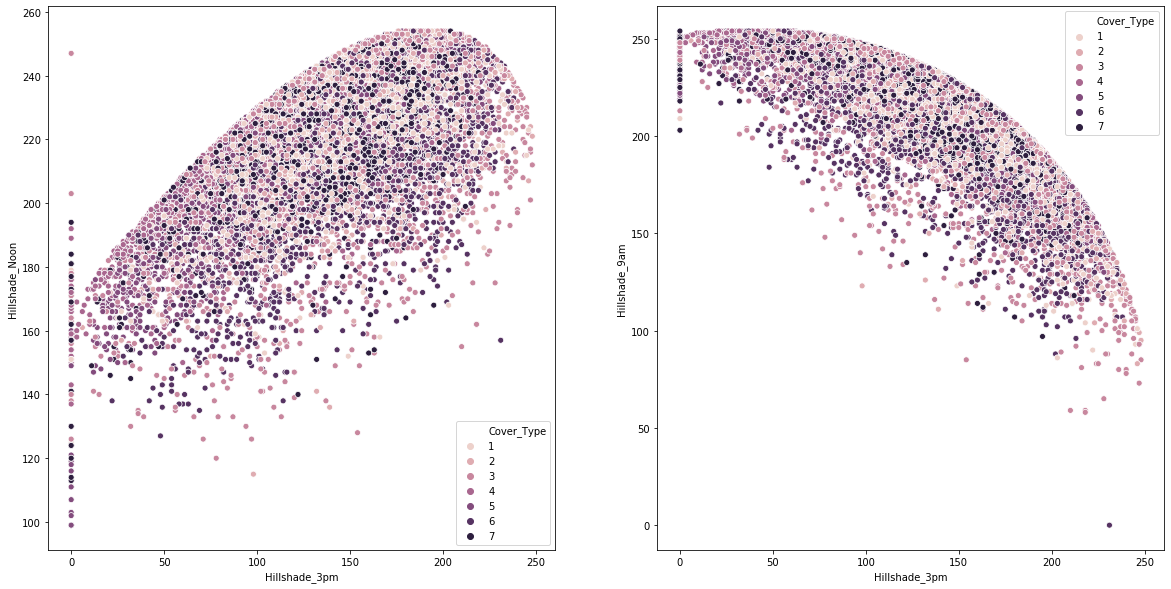

In [169]:
fig, ax = plt.subplots(1,2, figsize = (20,10))

sns.scatterplot(x = "Hillshade_3pm", y = "Hillshade_Noon", hue = "Cover_Type", data = trees, legend = 'full', ax = ax.ravel()[0])
sns.scatterplot(x = "Hillshade_3pm", y = "Hillshade_9am", hue = "Cover_Type", data = trees, legend = 'full', ax = ax.ravel()[1])

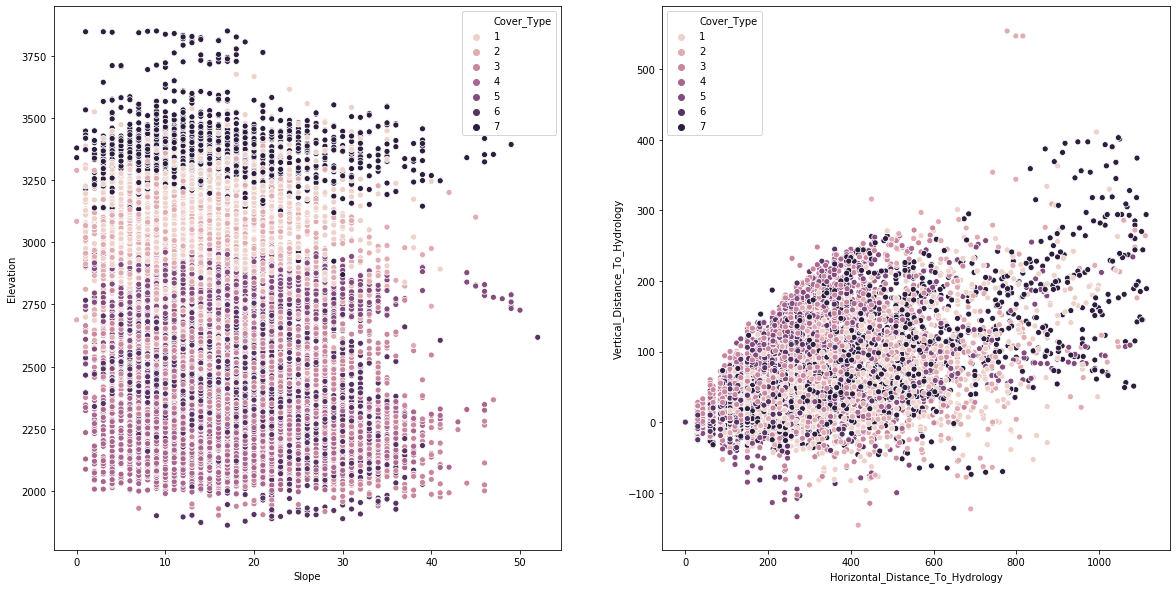

In [176]:
fig, ax = plt.subplots(1,2, figsize = (20,10))

sns.scatterplot(x = "Slope", y = "Elevation", hue = "Cover_Type", data = trees, legend = 'full', ax = ax.ravel()[0])
sns.scatterplot(x = "Horizontal_Distance_To_Hydrology", y = "Vertical_Distance_To_Hydrology", hue = "Cover_Type", data = trees, legend = 'full', ax = ax.ravel()[1])

In [178]:
continuous_variables = trees.columns[1:11]

print(continuous_variables)
print(trees.columns)

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points'],
      dtype='object')
Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type2

In [280]:
representative_features  = continuous_variables.to_list() + wilderness_types

representative_features.extend(('Soil_Type_number', 'Cover_Type'))

In [281]:
representative_features

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type_number',
 'Cover_Type']

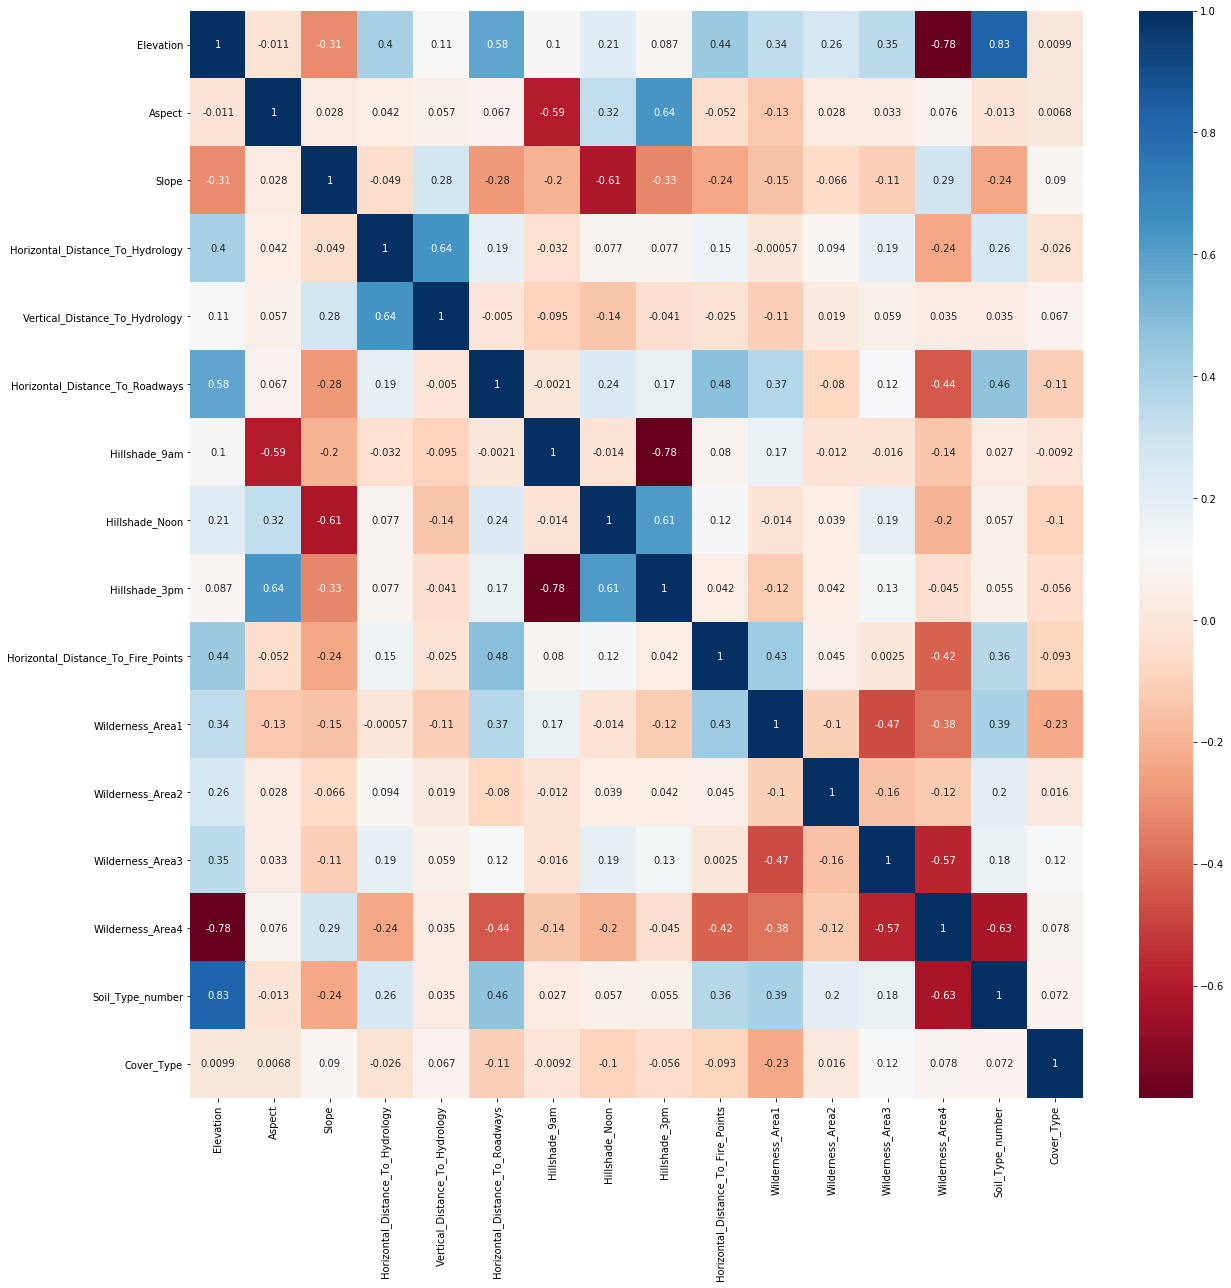

In [282]:
corr_dataframe = trees[representative_features]

corr_result = corr_dataframe.corr()

fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(corr_result, cmap = 'RdBu', annot = True, ax = ax)

In [283]:
corr_result.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type_number,Cover_Type
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.225506,0.093468,-0.056555,0.173857,0.117185,0.173133,-0.032093,0.112223,0.093002,0.146039,0.062007,0.075275,0.064879,-0.155430,0.190937,0.051953
std,0.420305,0.342710,0.362164,0.298376,0.298122,0.353186,0.370798,0.355220,0.403854,0.336772,0.370608,0.270357,0.345658,0.423053,0.383371,0.268711
min,-0.784305,-0.594687,-0.612609,-0.237546,-0.138424,-0.439612,-0.780072,-0.612609,-0.780072,-0.419462,-0.474456,-0.156804,-0.568263,-0.784305,-0.627643,-0.229228
25%,0.068019,-0.011688,-0.248532,-0.006926,-0.029408,-0.023831,-0.105374,-0.035686,-0.047900,-0.032141,-0.137207,-0.069818,-0.039899,-0.424500,0.032948,-0.065145
50%,0.239492,0.030473,-0.132654,0.085292,0.035051,0.146058,-0.013040,0.066918,0.048797,0.062445,-0.058608,0.023891,0.088777,-0.170121,0.123688,0.008343
75%,0.413786,0.069137,0.043447,0.207877,0.077106,0.395425,0.040217,0.221407,0.140680,0.380317,0.344568,0.057466,0.178719,0.045282,0.370440,0.073277
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [284]:
trees_w_numeric_soil = corr_dataframe

trees_w_numeric_soil['Euclidian_Distance_To_Hydrology'] = (trees_w_numeric_soil['Horizontal_Distance_To_Hydrology']**2 + 
                                                           trees_w_numeric_soil['Vertical_Distance_To_Hydrology']**2)**0.5
trees_w_numeric_soil['Mean_Elevation_Vertical_Distance_Hydrology'] = (trees_w_numeric_soil['Elevation'] + 
                                                                      trees_w_numeric_soil['Vertical_Distance_To_Hydrology'])/2
trees_w_numeric_soil['Mean_Distance_Hydrology_Firepoints'] = (trees_w_numeric_soil['Horizontal_Distance_To_Hydrology'] + 
                                                              trees_w_numeric_soil['Horizontal_Distance_To_Fire_Points'])/2
trees_w_numeric_soil['Mean_Distance_Hydrology_Roadways'] = (trees_w_numeric_soil['Horizontal_Distance_To_Hydrology'] + 
                                                            trees_w_numeric_soil['Horizontal_Distance_To_Roadways'])/2
trees_w_numeric_soil['Mean_Distance_Firepoints_Roadways'] = (trees_w_numeric_soil['Horizontal_Distance_To_Fire_Points'] + 
                                                             trees_w_numeric_soil['Horizontal_Distance_To_Roadways'])/2


/Users/praneeth/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/praneeth/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/praneeth/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [285]:
for col in trees_w_numeric_soil.columns:
    if trees_w_numeric_soil[col].min() >= 0:
        if col == 'Cover_Type':
            next
        else:
            trees_w_numeric_soil['sqrt' + col] = np.sqrt(trees_w_numeric_soil[col])


/Users/praneeth/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [291]:
correlations_transformed = pd.DataFrame(trees_w_numeric_soil.corr())
correlations_transformed

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,sqrtWilderness_Area1,sqrtWilderness_Area2,sqrtWilderness_Area3,sqrtWilderness_Area4,sqrtSoil_Type_number,sqrtEuclidian_Distance_To_Hydrology,sqrtMean_Elevation_Vertical_Distance_Hydrology,sqrtMean_Distance_Hydrology_Firepoints,sqrtMean_Distance_Hydrology_Roadways,sqrtMean_Distance_Firepoints_Roadways
Elevation,1.000000,-0.011402,-0.311520,0.404563,0.107143,0.575278,0.099648,0.214964,0.087392,0.441457,...,0.335276,0.264019,0.350054,-0.784305,0.802513,0.388199,0.990214,0.533513,0.633585,0.637371
Aspect,-0.011402,1.000000,0.028040,0.041929,0.057260,0.067014,-0.594687,0.324968,0.635614,-0.052364,...,-0.131571,0.028316,0.032630,0.075506,-0.000495,0.043772,-0.005169,-0.043234,0.078107,0.014952
Slope,-0.311520,0.028040,1.000000,-0.049432,0.275708,-0.276309,-0.199970,-0.612609,-0.326868,-0.239273,...,-0.154114,-0.066343,-0.111194,0.286233,-0.252378,0.061513,-0.267785,-0.239840,-0.281278,-0.315499
Horizontal_Distance_To_Hydrology,0.404563,0.041929,-0.049432,1.000000,0.638610,0.189326,-0.032461,0.076558,0.076743,0.153366,...,-0.000566,0.093842,0.189250,-0.237546,0.236485,0.938355,0.479644,0.356628,0.339674,0.209794
Vertical_Distance_To_Hydrology,0.107143,0.057260,0.275708,0.638610,1.000000,-0.005027,-0.094575,-0.138424,-0.041435,-0.025400,...,-0.114084,0.019466,0.058525,0.035207,0.007675,0.663103,0.239220,0.113436,0.097760,-0.015454
Horizontal_Distance_To_Roadways,0.575278,0.067014,-0.276309,0.189326,-0.005027,1.000000,-0.002091,0.240737,0.172590,0.484166,...,0.372443,-0.080243,0.119527,-0.439612,0.459233,0.160492,0.559497,0.482274,0.967357,0.876757
Hillshade_9am,0.099648,-0.594687,-0.199970,-0.032461,-0.094575,-0.002091,1.000000,-0.013873,-0.780072,0.079549,...,0.173292,-0.012208,-0.016135,-0.137771,-0.010347,-0.048364,0.087004,0.069576,-0.008698,0.047857
Hillshade_Noon,0.214964,0.324968,-0.612609,0.076558,-0.138424,0.240737,-0.013873,1.000000,0.614515,0.122268,...,-0.013574,0.038782,0.187571,-0.202471,0.050217,0.007993,0.193233,0.134449,0.267949,0.236809
Hillshade_3pm,0.087392,0.635614,-0.326868,0.076743,-0.041435,0.172590,-0.780072,0.614515,1.000000,0.041962,...,-0.119027,0.042232,0.130043,-0.045293,0.085658,0.035016,0.079022,0.057914,0.193696,0.139122
Horizontal_Distance_To_Fire_Points,0.441457,-0.052364,-0.239273,0.153366,-0.025400,0.484166,0.079549,0.122268,0.041962,1.000000,...,0.433239,0.045340,0.002513,-0.419462,0.370340,0.149271,0.431263,0.955823,0.473175,0.815306


In [289]:
correlations_transformed = pd.DataFrame(correlations_transformed['Cover_Type']).reset_index()
correlations_transformed.columns = ['Feature', ['Correlation with Cover_Type']]

In [297]:
correlations_transformed_ct = pd.DataFrame(correlations_transformed['Cover_Type'].reset_index())
correlations_transformed_ct.columns = ['Feature', 'Correlation with Cover_Type']

In [299]:
correlations_transformed_ct.columns = ['Feature', 'Correlation with Cover_Type']

,Feature,Correlation with Cover_Type
0,Elevation,0.009900
1,Aspect,0.006787
2,Slope,0.089669
3,Horizontal_Distance_To_Hydrology,-0.026004
4,Vertical_Distance_To_Hydrology,0.067093
5,Horizontal_Distance_To_Roadways,-0.112036
6,Hillshade_9am,-0.009249
7,Hillshade_Noon,-0.101127
8,Hillshade_3pm,-0.055721
9,Horizontal_Distance_To_Fire_Points,-0.093417


In [300]:
correlations_transformed_ct = correlations_transformed_ct.sort_values(by = 'Correlation with Cover_Type', ascending = True)

In [301]:
correlations_transformed2 =  correlations_transformed_ct[correlations_transformed_ct.Feature != 'Cover_Type' ]

In [304]:
correlations_transformed2.columns

Index(['Feature', 'Correlation with Cover_Type'], dtype='object')

In [310]:
transformed_features = ['sqrtHorizontal_Distance_To_Hydrology', 'sqrtMean_Distance_Hydrology_Roadways', 'sqrtEuclidian_Distance_To_Hydrology', 
                        'Mean_Elevation_Vertical_Distance_Hydrology', 'Mean_Distance_Firepoints_Roadways', 'Mean_Distance_Hydrology_Firepoints',  ]

all_features =  (['Elevation', 'Aspect', 'Slope', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points' ] + wilderness_types + ['Soil_Type_number'] + transformed_features)


In [311]:
trees_w_numeric_soil[all_features]

,Elevation,Aspect,Slope,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type_number,sqrtHorizontal_Distance_To_Hydrology,sqrtMean_Distance_Hydrology_Roadways,sqrtEuclidian_Distance_To_Hydrology,Mean_Elevation_Vertical_Distance_Hydrology,Mean_Distance_Firepoints_Roadways,Mean_Distance_Hydrology_Firepoints
0,2596,51,3,0,510,232,148,6279,1,0,0,0,29,16.062378,19.595918,16.062378,1298.0,3394.5,3268.5
1,2590,56,2,-6,390,235,151,6225,1,0,0,0,29,14.560220,17.349352,14.563135,1292.0,3307.5,3218.5
2,2804,139,9,65,3180,238,135,6121,1,0,0,0,12,16.370706,41.521079,16.606319,1434.5,4650.5,3194.5
3,2785,155,18,118,3090,238,122,6211,1,0,0,0,30,15.556349,40.816663,16.408411,1451.5,4650.5,3226.5
4,2595,45,2,-1,391,234,150,6172,1,0,0,0,29,12.369317,16.492423,12.369449,1297.0,3281.5,3162.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,23,7,660,251,214,1282,0,0,1,0,4,16.062378,21.424285,16.065334,1307.0,971.0,770.0
15116,2603,121,19,195,618,221,91,1325,0,0,1,0,4,25.159491,25.009998,25.736256,1399.0,971.5,979.0
15117,2492,134,25,117,335,220,83,1187,0,0,1,0,4,19.104973,18.708287,19.577886,1304.5,761.0,776.0
15118,2487,167,28,101,242,237,119,932,0,0,1,0,4,14.764823,15.165751,15.500331,1294.0,587.0,575.0


In [316]:
trees_training = trees_w_numeric_soil[all_features]
labels_training = trees_w_numeric_soil["Cover_Type"].values


In [317]:
trees_training

,Elevation,Aspect,Slope,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type_number,sqrtHorizontal_Distance_To_Hydrology,sqrtMean_Distance_Hydrology_Roadways,sqrtEuclidian_Distance_To_Hydrology,Mean_Elevation_Vertical_Distance_Hydrology,Mean_Distance_Firepoints_Roadways,Mean_Distance_Hydrology_Firepoints
0,2596,51,3,0,510,232,148,6279,1,0,0,0,29,16.062378,19.595918,16.062378,1298.0,3394.5,3268.5
1,2590,56,2,-6,390,235,151,6225,1,0,0,0,29,14.560220,17.349352,14.563135,1292.0,3307.5,3218.5
2,2804,139,9,65,3180,238,135,6121,1,0,0,0,12,16.370706,41.521079,16.606319,1434.5,4650.5,3194.5
3,2785,155,18,118,3090,238,122,6211,1,0,0,0,30,15.556349,40.816663,16.408411,1451.5,4650.5,3226.5
4,2595,45,2,-1,391,234,150,6172,1,0,0,0,29,12.369317,16.492423,12.369449,1297.0,3281.5,3162.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,23,7,660,251,214,1282,0,0,1,0,4,16.062378,21.424285,16.065334,1307.0,971.0,770.0
15116,2603,121,19,195,618,221,91,1325,0,0,1,0,4,25.159491,25.009998,25.736256,1399.0,971.5,979.0
15117,2492,134,25,117,335,220,83,1187,0,0,1,0,4,19.104973,18.708287,19.577886,1304.5,761.0,776.0
15118,2487,167,28,101,242,237,119,932,0,0,1,0,4,14.764823,15.165751,15.500331,1294.0,587.0,575.0


In [332]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split

# for data manipulation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 60)

# for visualization
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
%matplotlib inline
# to include graphs inline within the frontends next to code
import seaborn as sns
sns.set_context(font_scale=2)

# to bypass warnings in various dataframe assignments
pd.options.mode.chained_assignment = None

# machine learning models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier

# preprocessing functions and evaluation models
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler


In [333]:
X_train, X_valid, y_train, y_valid = train_test_split(trees_training, labels_training, test_size=0.2, random_state=1)



In [330]:
pip install lightgbm

     |████████████████████████████████| 679 kB 377 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [334]:
# Create dummy classifer
dummy = DummyClassifier(strategy='stratified', random_state=1)

# train the model
dummy.fit(X_train, y_train)

# Get accuracy score
baseline_accuracy = dummy.score(X_valid, y_valid)


In [335]:
baseline_accuracy

0.1426675514266755

In [336]:
# create scaler
scaler = StandardScaler()

# apply normalization to training set and transform training set
X_train_scaled = scaler.fit_transform(X_train, y_train)

# transform validation set
X_valid_scaled = scaler.transform(X_valid)


In [337]:
def fit_evaluate_model(model, X_train, y_train, X_valid, Y_valid):
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_valid)
    return accuracy_score(y_valid, y_predicted)


In [339]:
knn_classifier = KNeighborsClassifier()
knn_accuracy = fit_evaluate_model(knn_classifier, X_train_scaled, y_train, X_valid_scaled, y_valid)

rf_classifier = RandomForestClassifier()
rf_accuracy = fit_evaluate_model(rf_classifier, X_train, y_train, X_valid, y_valid)

xrf_classifier = ExtraTreesClassifier()
xrf_accuracy = fit_evaluate_model(xrf_classifier, X_train, y_train, X_valid, y_valid)

xgb_classifier = XGBClassifier()
xgb_accuracy = fit_evaluate_model(xgb_classifier, X_train, y_train, X_valid, y_valid)


In [341]:
model_performance = pd.DataFrame({'model': ['knn', 'random forest', 'extra trees', 'xgb classifier'], 'scores': [knn_accuracy, rf_accuracy, xrf_accuracy, xgb_accuracy]})

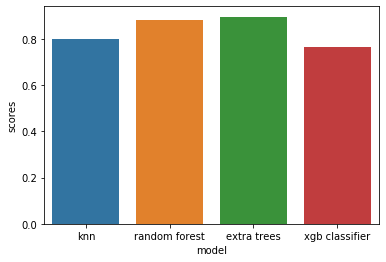

In [342]:
sns.barplot('model', 'scores', data = model_performance)

In [343]:
# The number of trees in the forest algorithm, default value is 10.
n_estimators = [50, 100, 300, 500, 1000]

# The minimum number of samples required to split an internal node, default value is 2.
min_samples_split = [2, 3, 5, 7, 9]

# The minimum number of samples required to be at a leaf node, default value is 1.
min_samples_leaf = [1, 2, 4, 6, 8]

# The number of features to consider when looking for the best split, default value is auto.
max_features = ['auto', 'sqrt', 'log2', None] 

# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}


# create model
model = ExtraTreesClassifier(random_state=42)

# create Randomized search object
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=5, n_iter=10, 
                               scoring = 'accuracy',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True, 
                               random_state=42)


In [348]:
random_cv.fit(trees_training, labels_training)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                        

In [349]:
random_cv.best_estimator_

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features=None,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=300,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [352]:
optimal_extra_trees = ExtraTreesClassifier(n_estimators = 300 , max_features = None  , min_samples_leaf = 1, min_samples_split = 2, random_state = 42)

xrf_accuracy_h_tuned = fit_evaluate_model(optimal_extra_trees, X_train, y_train, X_valid, y_valid) 

In [356]:
print(xrf_accuracy)
print(xrf_accuracy_h_tuned)
print(xrf_accuracy_h_tuned_grid_search)

0.8954877239548772
0.8928334439283344
0.893828798938288


In [354]:
optimal_extra_trees = ExtraTreesClassifier(n_estimators = 500 , max_features = None  , min_samples_leaf = 1, min_samples_split = 2, random_state = 42)

xrf_accuracy_h_tuned_grid_search = fit_evaluate_model(optimal_extra_trees, X_train, y_train, X_valid, y_valid) 

In [355]:
print(xrf_accuracy_h_tuned_grid_search)

0.893828798938288


In [358]:
y_predicted = optimal_extra_trees.predict(X_valid)
cover_types = sorted(trees['Cover_Type'].value_counts().index.tolist())

In [359]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
    # else:
        # print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

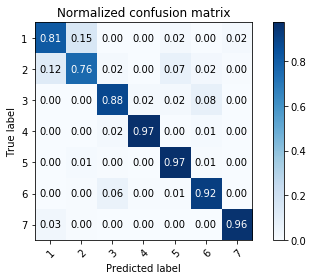

In [360]:
plot_confusion_matrix(y_valid, y_predicted, classes=cover_types, normalize=True,
                      title='Normalized confusion matrix')
plt.show()


In [361]:
trees_test = pd.read_csv('/Users/praneeth/Downloads/Forest Cover Prediction/test.csv')

In [367]:

trees_test["Soil_Type"] = trees_test.iloc[:,15:55].idxmax(1)
trees_test["Soil_Type_number"] = trees_test["Soil_Type"].apply(tail_return)

In [368]:
# add linear combinations of columns
trees_test['Euclidian_Distance_To_Hydrology'] = (trees_test['Horizontal_Distance_To_Hydrology']**2 + 
                                                 trees_test['Vertical_Distance_To_Hydrology']**2)**0.5
trees_test['Mean_Elevation_Vertical_Distance_Hydrology'] = (trees_test['Elevation'] + 
                                                            trees_test['Vertical_Distance_To_Hydrology'])/2
trees_test['Mean_Distance_Hydrology_Firepoints'] = (trees_test['Horizontal_Distance_To_Hydrology'] + 
                                                    trees_test['Horizontal_Distance_To_Fire_Points'])/2
trees_test['Mean_Distance_Hydrology_Roadways'] = (trees_test['Horizontal_Distance_To_Hydrology'] + 
                                                  trees_test['Horizontal_Distance_To_Roadways'])/2
trees_test['Mean_Distance_Firepoints_Roadways'] = (trees_test['Horizontal_Distance_To_Fire_Points'] + 
                                                   trees_test['Horizontal_Distance_To_Roadways'])/2

trees_test['sqrt' + 'Horizontal_Distance_To_Hydrology'] = np.sqrt(trees_test['Horizontal_Distance_To_Hydrology'])
trees_test['sqrt' + 'Mean_Distance_Hydrology_Roadways'] = np.sqrt(trees_test['Mean_Distance_Hydrology_Roadways'])
trees_test['sqrt' + 'Euclidian_Distance_To_Hydrology'] = np.sqrt(trees_test['Euclidian_Distance_To_Hydrology'])


In [374]:
X_test = trees_test[all_features]
print(len(X_test.columns))
print(trees_test.shape)

19
(565892, 65)


In [375]:
test_predictions = optimal_extra_trees.predict(X_test)


In [376]:
sub_dataframe = pd.DataFrame({'Id': trees_test["Id"], 'Cover_Type': test_predictions})

In [379]:
sub_dataframe.to_csv('/Users/praneeth/Downloads/Forest Cover Prediction/Sub_attempt1.csv', index = False)